In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read 311 data
df311 = pd.read_csv('noise_data.csv')

In [3]:
df311.head()

,Unnamed: 0,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Descriptor,Complaint_Type,Resolution_Description,Resolution_Action_UpdatedDate,zipcode,Borough,Latitude,Longitude,Location
0,0,52494258,2021-11-12 23:32:03,11/13/2021 12:01:47 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/13/2021 12:01:53 AM,10009.0,MANHATTAN,40.728098,-73.980986,"(40.72809840521916, -73.98098598390919)"
1,1,52494267,2021-11-12 22:51:56,11/13/2021 02:07:21 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,11/13/2021 02:07:28 AM,11385.0,QUEENS,40.703420,-73.910624,"(40.70342006960225, -73.91062391218271)"
2,2,52494269,2021-11-12 21:52:21,11/12/2021 10:46:15 PM,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/12/2021 10:46:20 PM,10012.0,MANHATTAN,40.727491,-74.002594,"(40.727490610002285, -74.00259410868611)"
3,3,52762434,2021-12-10 23:07:33,12/10/2021 11:16:17 PM,NYPD,New York City Police Department,Banging/Pounding,Noise - Residential,The Police Department reviewed your complaint ...,12/10/2021 11:16:21 PM,10456.0,BRONX,40.838195,-73.911184,"(40.83819547525466, -73.91118371113687)"
4,6,47668843,2020-09-24 00:53:51,09/24/2020 02:13:27 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,09/24/2020 02:13:29 AM,10456.0,BRONX,40.834562,-73.915424,"(40.83456191927017, -73.91542387418657)"


In [4]:
import geopandas as gpd

/Users/yufeitang/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
#create geodataframe based on longitude and latitude
gdf311 = gpd.GeoDataFrame(df311, geometry=gpd.points_from_xy(df311.Longitude, df311.Latitude))
gdf311.head()

,Unnamed: 0,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Descriptor,Complaint_Type,Resolution_Description,Resolution_Action_UpdatedDate,zipcode,Borough,Latitude,Longitude,Location,geometry
0,0,52494258,2021-11-12 23:32:03,11/13/2021 12:01:47 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/13/2021 12:01:53 AM,10009.0,MANHATTAN,40.728098,-73.980986,"(40.72809840521916, -73.98098598390919)",POINT (-73.98099 40.72810)
1,1,52494267,2021-11-12 22:51:56,11/13/2021 02:07:21 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,11/13/2021 02:07:28 AM,11385.0,QUEENS,40.703420,-73.910624,"(40.70342006960225, -73.91062391218271)",POINT (-73.91062 40.70342)
2,2,52494269,2021-11-12 21:52:21,11/12/2021 10:46:15 PM,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/12/2021 10:46:20 PM,10012.0,MANHATTAN,40.727491,-74.002594,"(40.727490610002285, -74.00259410868611)",POINT (-74.00259 40.72749)
3,3,52762434,2021-12-10 23:07:33,12/10/2021 11:16:17 PM,NYPD,New York City Police Department,Banging/Pounding,Noise - Residential,The Police Department reviewed your complaint ...,12/10/2021 11:16:21 PM,10456.0,BRONX,40.838195,-73.911184,"(40.83819547525466, -73.91118371113687)",POINT (-73.91118 40.83820)
4,6,47668843,2020-09-24 00:53:51,09/24/2020 02:13:27 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,09/24/2020 02:13:29 AM,10456.0,BRONX,40.834562,-73.915424,"(40.83456191927017, -73.91542387418657)",POINT (-73.91542 40.83456)


In [6]:
#read shapefiles of NYC NTA
nta=gpd.read_file('geo_export_979da14b-6141-4f0f-bf98-10aac77d95a0.shp')
nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711758,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."
3,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316786,"POLYGON ((-73.75205 40.70523, -73.75174 40.704..."
4,3.0,Brooklyn,047,BK69,Clinton Hill,2.052820e+07,23971.466236,"POLYGON ((-73.95337 40.68064, -73.95328 40.680..."


In [7]:
gdf311 = gdf311.dropna(subset = ['Latitude', 'Longitude'])

In [8]:
#spatial join(demographics)
gdf311.crs = nta.crs
nta_demo311 = gpd.sjoin(gdf311, nta, how="inner", op="intersects")
nta_demo311.head()

/Users/yufeitang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,Unnamed: 0,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Descriptor,Complaint_Type,Resolution_Description,Resolution_Action_UpdatedDate,...,Location,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,0,52494258,2021-11-12 23:32:03,11/13/2021 12:01:47 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/13/2021 12:01:53 AM,...,"(40.72809840521916, -73.98098598390919)",POINT (-73.98099 40.72810),108,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094
63,456,52929198,2021-12-31 01:47:57,12/31/2021 02:30:19 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,12/31/2021 02:30:23 AM,...,"(40.72999319849334, -73.98768924719015)",POINT (-73.98769 40.72999),108,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094
65,465,52929216,2021-12-31 00:18:17,12/31/2021 12:30:49 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Commercial,The Police Department responded to the complai...,12/31/2021 12:30:52 AM,...,"(40.72615001233742, -73.98347596822626)",POINT (-73.98348 40.72615),108,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094
100,552,52930044,2021-12-30 23:08:37,12/30/2021 11:57:05 PM,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,12/30/2021 11:57:10 PM,...,"(40.72507949523086, -73.98305051216566)",POINT (-73.98305 40.72508),108,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094
115,581,52930146,2021-12-31 00:10:26,12/31/2021 12:29:46 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Commercial,The Police Department responded to the complai...,12/31/2021 12:29:52 AM,...,"(40.723493674063505, -73.98825686038411)",POINT (-73.98826 40.72349),108,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094


In [9]:
table = pd.pivot_table(nta_demo311, values=['Unique_Key'], index =['ntacode'], aggfunc = len)
nta311 = pd.merge(nta,table,left_on='ntacode',right_index=True)
nta311.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,Unique_Key
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",1986
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711758,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",1503
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",599
3,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316786,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",2695
4,3.0,Brooklyn,047,BK69,Clinton Hill,2.052820e+07,23971.466236,"POLYGON ((-73.95337 40.68064, -73.95328 40.680...",5697


/Users/yufeitang/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


<AxesSubplot:title={'center':'311 noise complaints'}>

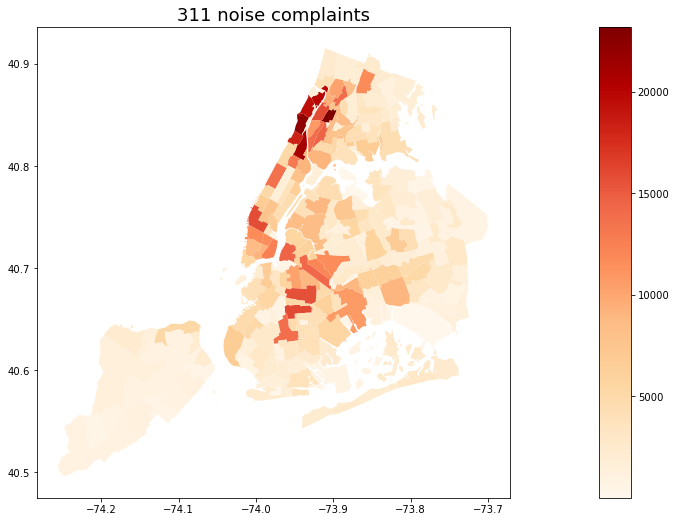

In [10]:
#now color the NTA zones based on the number of 311 noise complaints
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, figsize=(12, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax.set_title("311 noise complaints", fontsize=18)
nta311.plot(axes=ax, column='Unique_Key', legend = True, cmap='OrRd',cax=cax)

/Users/yufeitang/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


<AxesSubplot:title={'center':'311 noise complaints(Log)'}>

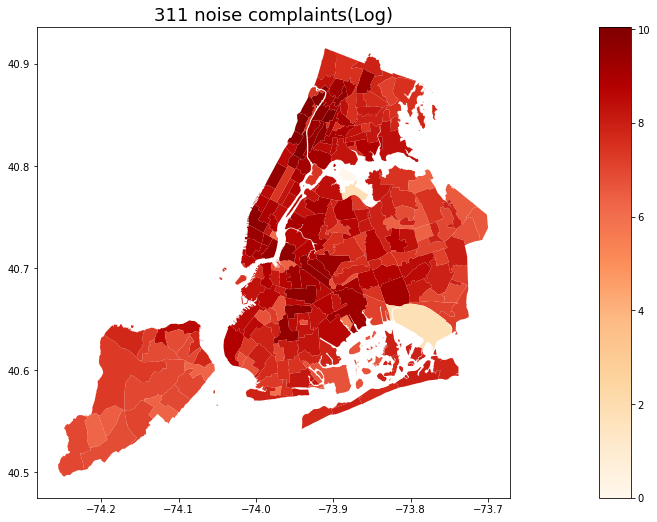

In [11]:
#as values vary widely try log-scale
import numpy as np

nta311['log_unique_key'] = np.log(nta311.Unique_Key)

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, figsize=(12, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax.set_title("311 noise complaints(Log)", fontsize=18)
nta311.plot(axes=ax, column='log_unique_key', legend = True, cmap='OrRd',cax=cax)

In [12]:
#read explainatory data by NTA
variables = pd.read_excel('dem_job_new.xlsx')
variables.head()

,GeoType,GeogName,GeoID,Borough,Total Population,Unemployed,Below_poverty,Median_income_count,Disability,Occupied_housing_units1,...,Owner_occupied_rate,Renter-occupied_rate,Median_rooms_number,With_elders1,With_elders,Households_size,Veterans1,Veterans,Low_income1,Low_income
0,NTA2010,Bath Beach,BK27,Brooklyn,33163,1128,898,75950.0,3417,11428,...,39.079454,60.920546,4.2,3404,3.531990,2.88,464,2.666518,895,2.951823
1,NTA2010,Bay Ridge,BK31,Brooklyn,79134,3151,2440,86319.0,8024,33487,...,36.008003,63.991997,3.9,9416,3.973866,2.36,2278,3.357554,2313,3.364176
2,NTA2010,Bedford,BK75,Brooklyn,75318,4621,4357,62616.0,7623,26059,...,18.511839,81.488161,4.1,4646,3.667079,2.86,1322,3.121231,3673,3.565021
3,NTA2010,Bensonhurst East,BK29,Brooklyn,64267,2725,2834,65715.0,6687,22187,...,34.475143,65.524857,4.1,7277,3.861952,2.89,1134,3.054613,2356,3.372175
4,NTA2010,Bensonhurst West,BK28,Brooklyn,91646,4049,3331,70198.0,10144,29909,...,34.548129,65.451871,4.1,9096,3.958850,3.04,1223,3.087426,2330,3.367356


In [13]:
#add the variables columns to the noise dataframe
var_noise = pd.merge(nta_demo311,variables,left_on='ntacode',right_on='GeoID')
var_noise.head()

,Unnamed: 0,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Descriptor,Complaint_Type,Resolution_Description,Resolution_Action_UpdatedDate,...,Owner_occupied_rate,Renter-occupied_rate,Median_rooms_number,With_elders1,With_elders,Households_size,Veterans1,Veterans,Low_income1,Low_income
0,0,52494258,2021-11-12 23:32:03,11/13/2021 12:01:47 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/13/2021 12:01:53 AM,...,11.189155,88.810845,3.0,3540,3.549003,1.68,614,2.788168,2447,3.388634
1,456,52929198,2021-12-31 01:47:57,12/31/2021 02:30:19 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,12/31/2021 02:30:23 AM,...,11.189155,88.810845,3.0,3540,3.549003,1.68,614,2.788168,2447,3.388634
2,465,52929216,2021-12-31 00:18:17,12/31/2021 12:30:49 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Commercial,The Police Department responded to the complai...,12/31/2021 12:30:52 AM,...,11.189155,88.810845,3.0,3540,3.549003,1.68,614,2.788168,2447,3.388634
3,552,52930044,2021-12-30 23:08:37,12/30/2021 11:57:05 PM,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,12/30/2021 11:57:10 PM,...,11.189155,88.810845,3.0,3540,3.549003,1.68,614,2.788168,2447,3.388634
4,581,52930146,2021-12-31 00:10:26,12/31/2021 12:29:46 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Commercial,The Police Department responded to the complai...,12/31/2021 12:29:52 AM,...,11.189155,88.810845,3.0,3540,3.549003,1.68,614,2.788168,2447,3.388634


In [14]:
var_noise.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 998872 entries, 0 to 998871
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   Unnamed: 0                     998872 non-null  int64   
 1   Unique_Key                     998872 non-null  int64   
 2   Created_Date                   998872 non-null  object  
 3   Closed_Date                    998872 non-null  object  
 4   Agency                         998872 non-null  object  
 5   Agency_Name                    998872 non-null  object  
 6   Descriptor                     998872 non-null  object  
 7   Complaint_Type                 998872 non-null  object  
 8   Resolution_Description         998872 non-null  object  
 9   Resolution_Action_UpdatedDate  998872 non-null  object  
 10  zipcode                        998872 non-null  float64 
 11  Borough_x                      998872 non-null  object  
 12  Latitude

In [15]:
var_noise1 = var_noise.copy()

In [16]:
# Let's convert the timestamp to datatime format so we can separate date, time
var_noise1['Created_Date'] = pd.to_datetime(var_noise1['Created_Date'])

In [17]:
#Separate year, month, day, weekday, hour from timestamp
var_noise1["year"] = var_noise1['Created_Date'].dt.year
var_noise1["month"] = var_noise1['Created_Date'].dt.month
var_noise1["day_of_month"] = var_noise1['Created_Date'].dt.day
var_noise1["day_of_week"] = var_noise1['Created_Date'].dt.weekday
var_noise1["hour"] = var_noise1['Created_Date'].dt.hour
var_noise1.head()

,Unnamed: 0,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Descriptor,Complaint_Type,Resolution_Description,Resolution_Action_UpdatedDate,...,Households_size,Veterans1,Veterans,Low_income1,Low_income,year,month,day_of_month,day_of_week,hour
0,0,52494258,2021-11-12 23:32:03,11/13/2021 12:01:47 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/13/2021 12:01:53 AM,...,1.68,614,2.788168,2447,3.388634,2021,11,12,4,23
1,456,52929198,2021-12-31 01:47:57,12/31/2021 02:30:19 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,12/31/2021 02:30:23 AM,...,1.68,614,2.788168,2447,3.388634,2021,12,31,4,1
2,465,52929216,2021-12-31 00:18:17,12/31/2021 12:30:49 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Commercial,The Police Department responded to the complai...,12/31/2021 12:30:52 AM,...,1.68,614,2.788168,2447,3.388634,2021,12,31,4,0
3,552,52930044,2021-12-30 23:08:37,12/30/2021 11:57:05 PM,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,12/30/2021 11:57:10 PM,...,1.68,614,2.788168,2447,3.388634,2021,12,30,3,23
4,581,52930146,2021-12-31 00:10:26,12/31/2021 12:29:46 AM,NYPD,New York City Police Department,Loud Music/Party,Noise - Commercial,The Police Department responded to the complai...,12/31/2021 12:29:52 AM,...,1.68,614,2.788168,2447,3.388634,2021,12,31,4,0


In [18]:
import seaborn as sns

<AxesSubplot:xlabel='year', ylabel='count'>

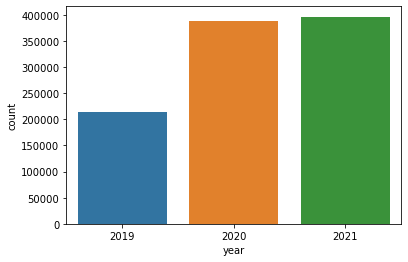

In [19]:
# now let's see how many rows are there for each year
sns.countplot(x="year", data=var_noise1)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

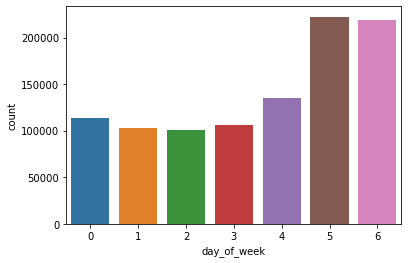

In [20]:
# now let's see how many rows are there for each day of the week
sns.countplot(x="day_of_week", data=var_noise1)

<AxesSubplot:xlabel='month', ylabel='count'>

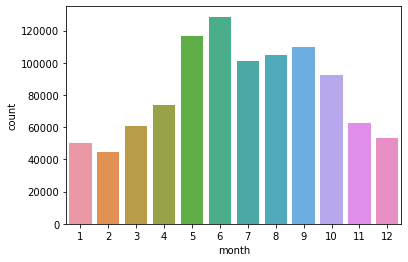

In [21]:
# now let's see if month has any effect
sns.countplot(x="month", data=var_noise1)

<AxesSubplot:xlabel='hour', ylabel='count'>

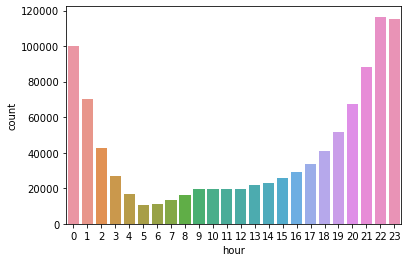

In [22]:
# now let's see if hours has any effect
sns.countplot(x="hour", data=var_noise1)

In [23]:
noise_nta = var_noise1.groupby(by='ntacode').count()

In [24]:
noise_nta.reset_index(inplace=True)

In [25]:
noise_nta = noise_nta[['ntacode','Unique_Key']]


In [26]:
noise_nta

,ntacode,Unique_Key
0,BK09,2085
1,BK17,3642
2,BK19,1850
3,BK21,2626
4,BK23,363
...,...,...
189,SI36,1099
190,SI37,2296
191,SI45,1018
192,SI48,637


In [27]:
#add the variables columns to the noise dataframe
noise_nta = pd.merge(noise_nta,variables,left_on='ntacode',right_on='GeoID')
noise_nta.head()

,ntacode,Unique_Key,GeoType,GeogName,GeoID,Borough,Total Population,Unemployed,Below_poverty,Median_income_count,...,Owner_occupied_rate,Renter-occupied_rate,Median_rooms_number,With_elders1,With_elders,Households_size,Veterans1,Veterans,Low_income1,Low_income
0,BK09,2085,NTA2010,Brooklyn Heights-Cobble Hill,BK09,Brooklyn,24140,545,100,178252.0,...,43.194046,56.805954,3.3,2413,3.382557,1.88,433,2.636488,451,2.654177
1,BK17,3642,NTA2010,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,BK17,Brooklyn,66293,3216,2304,73419.0,...,53.408657,46.591343,4.1,9084,3.958277,2.49,1513,3.179839,2482,3.394802
2,BK19,1850,NTA2010,Brighton Beach,BK19,Brooklyn,34157,1196,1680,61590.0,...,31.070441,68.929559,3.3,5820,3.764923,2.40,425,2.628389,2781,3.444201
3,BK21,2626,NTA2010,Seagate-Coney Island,BK21,Brooklyn,29677,2049,1845,51426.0,...,15.362900,84.637100,4.0,3902,3.591287,2.59,746,2.872739,2396,3.379487
4,BK23,363,NTA2010,West Brighton,BK23,Brooklyn,15754,692,468,58592.0,...,41.859321,58.140679,3.5,4370,3.640481,1.94,347,2.540329,1152,3.061452


In [28]:
noise_nta.rename(columns = {'Unique_Key':'Complaints_number'},inplace=True)

In [29]:
noise_nta.dropna(inplace=True)

In [30]:
# some basic statistics about the dataset
print("Number of missing values in the data", noise_nta.isnull().sum().sum())

Number of missing values in the data 0


/Users/yufeitang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Complaints_number', ylabel='Density'>

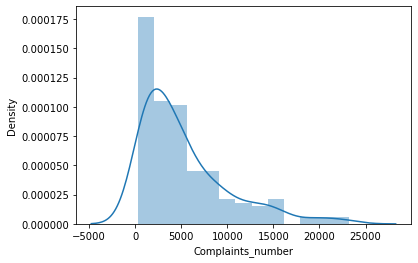

In [31]:
#let's look at the distribution of the count 
sns.distplot(noise_nta['Complaints_number'], label='count')


In [32]:
#drop unnecessary columns for regression
noise_nta.drop('Unemployed', axis=1, inplace=True)
noise_nta.drop('Below_poverty', axis=1, inplace=True)
noise_nta.drop('Disability', axis=1, inplace=True)
noise_nta.drop('Owner_occupied', axis=1, inplace=True)
noise_nta.drop('Renter_occupied', axis=1, inplace=True)
noise_nta.drop('Owner_occupied_rate', axis=1, inplace=True)
noise_nta.drop('Total Population', axis=1, inplace=True)
noise_nta.drop('Median_income_count', axis=1, inplace=True)
noise_nta.drop('Occupied_housing_units1', axis=1, inplace=True)
#noise_nta.drop('Occupied_housing_units', axis=1, inplace=True)
#noise_nta.drop('Median_income', axis=1, inplace=True)
noise_nta.drop('With_elders1', axis=1, inplace=True)
noise_nta.drop('Veterans1', axis=1, inplace=True)
noise_nta.drop('With_elders', axis=1, inplace=True)
noise_nta.drop('Veterans', axis=1, inplace=True)
noise_nta.drop('Median_income', axis=1, inplace=True)
noise_nta.drop('Households_size', axis=1, inplace=True)
noise_nta.drop('Low_income1', axis=1, inplace=True)
noise_nta.drop('Below_poverty_rate', axis=1, inplace=True)

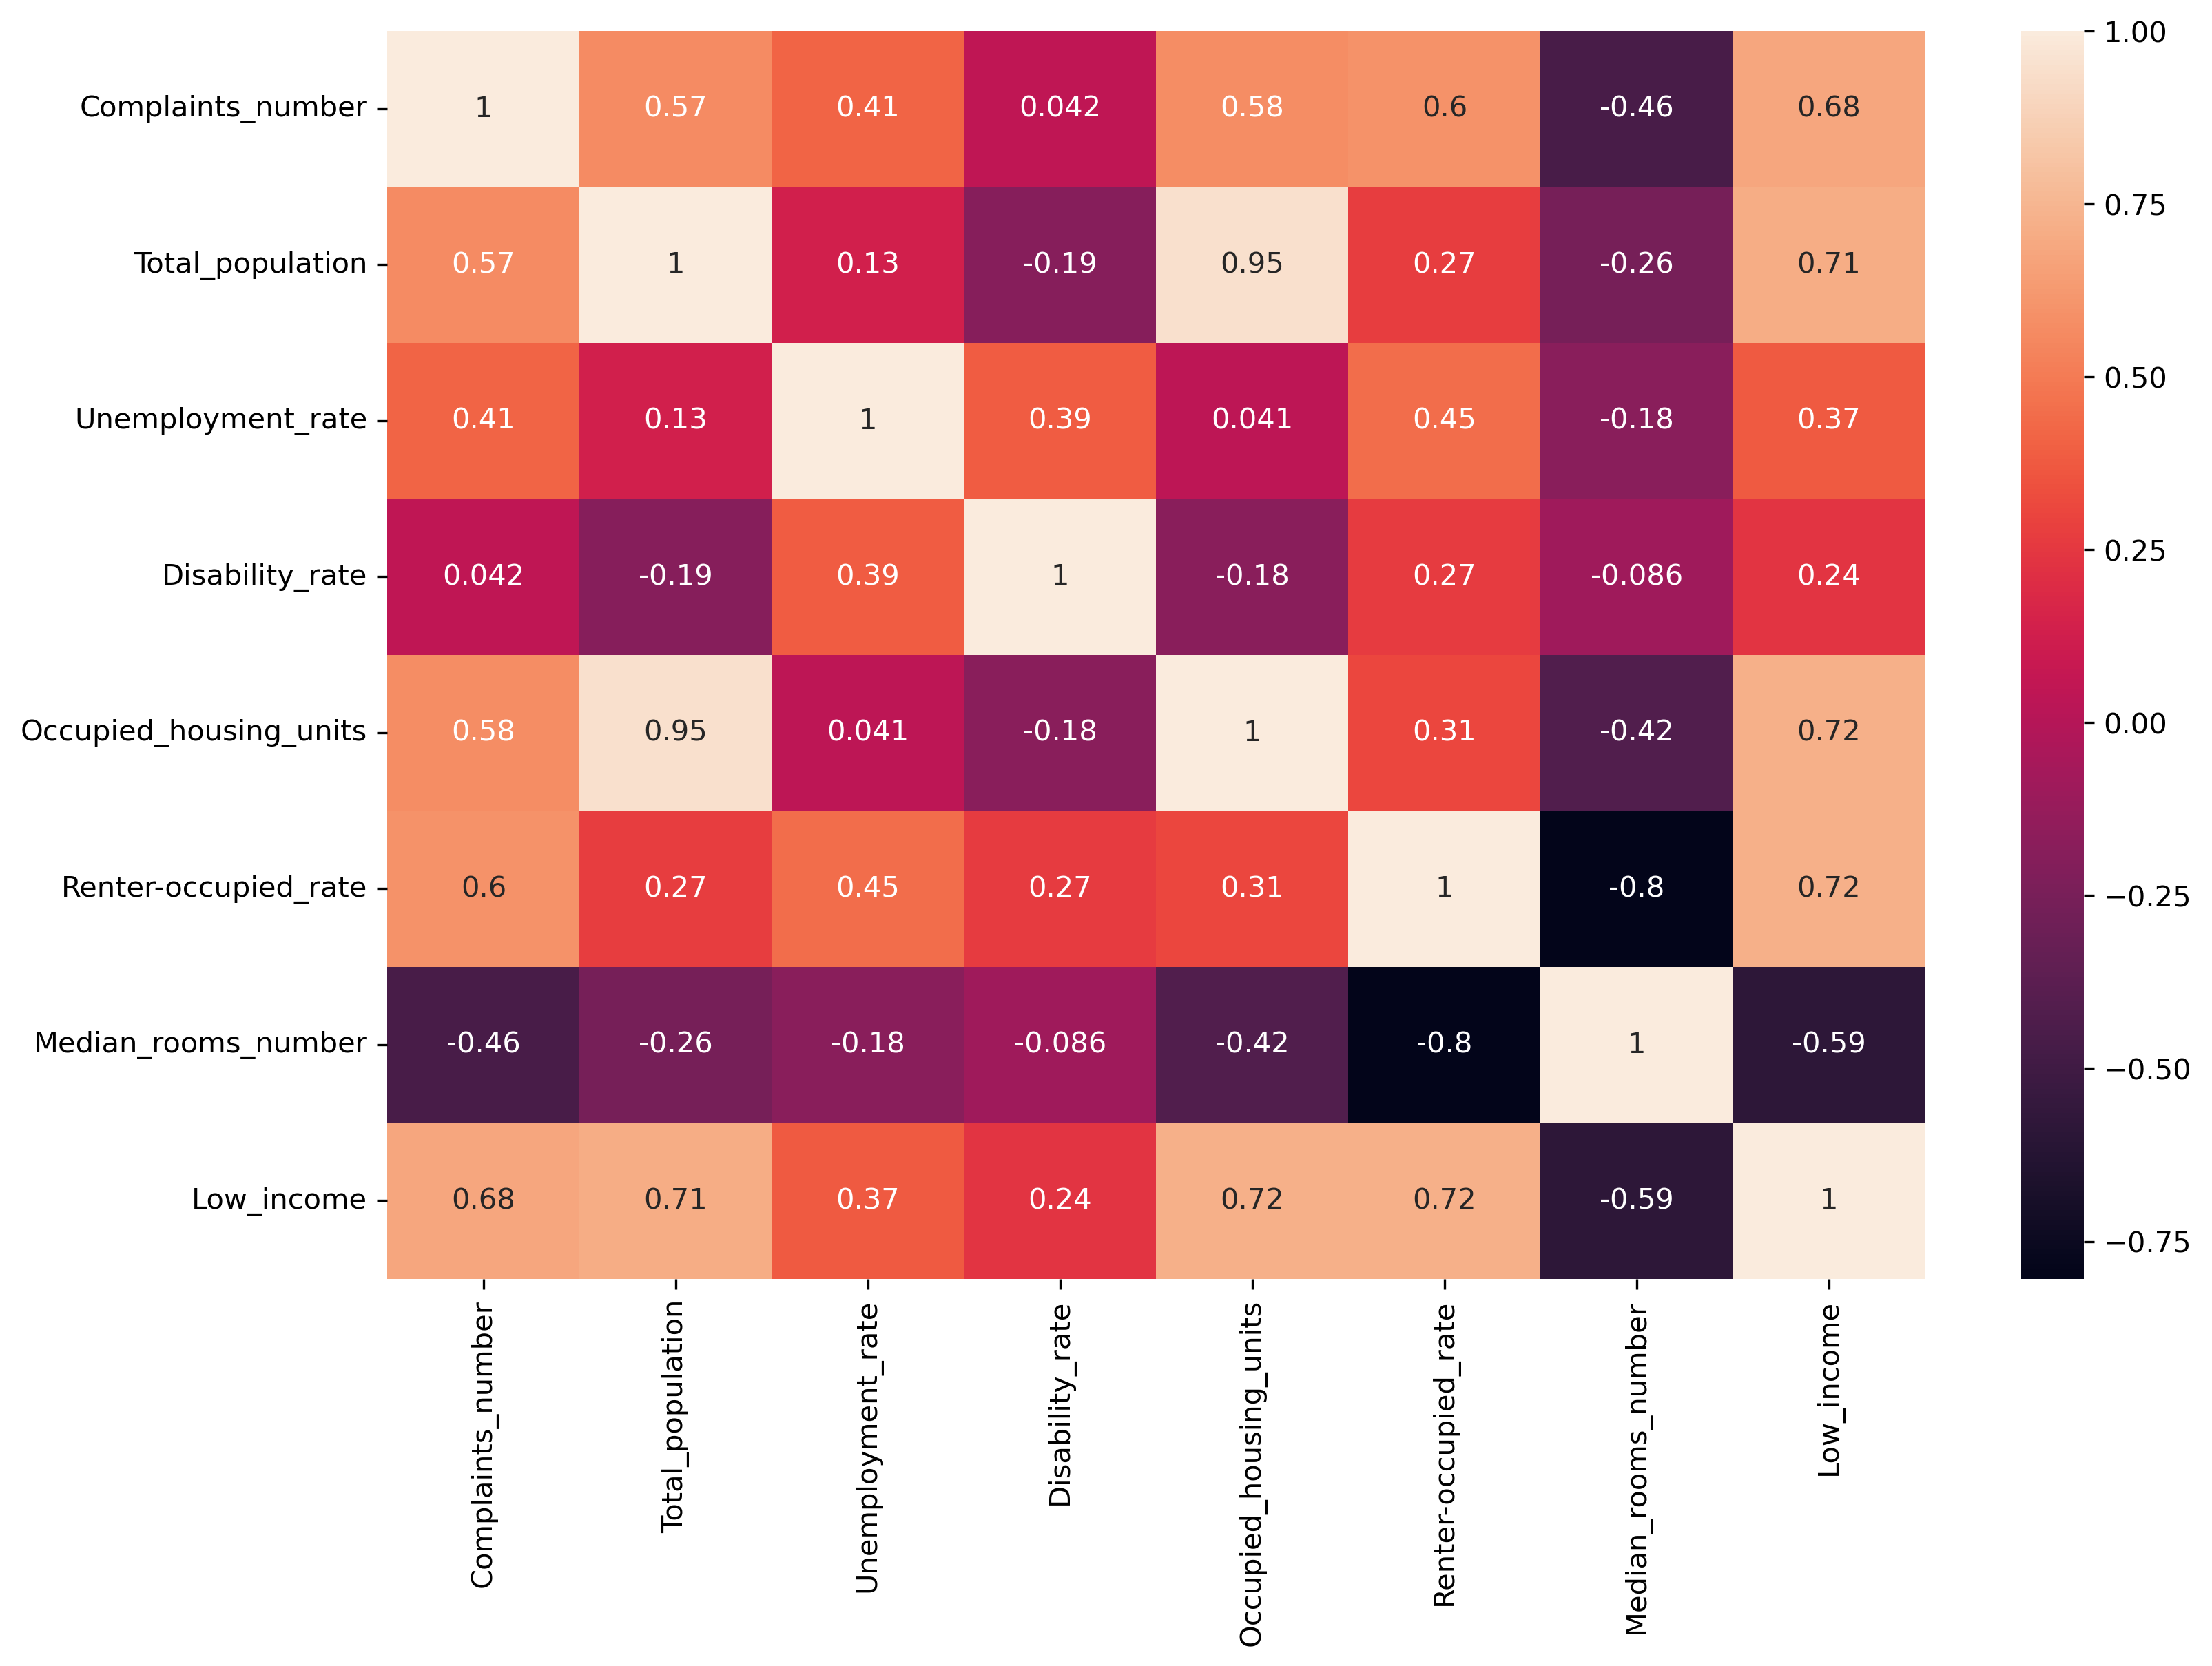

In [33]:
#let's take a look at the correlation heatmap

plt.figure(figsize=(12,8), dpi=300)
#sns.set(font_scale=2) 
res = sns.heatmap(noise_nta.corr(), annot=True)
res.set_xticklabels(res.get_xmajorticklabels())
res.set_yticklabels(res.get_ymajorticklabels())
plt.savefig("correlation_matrix.png", dpi=600)

In [34]:
noise_nta['Complaints_number_Log'] = np.log(noise_nta['Complaints_number'])

In [35]:
noise_nta = noise_nta.replace([np.inf, -np.inf, -0], 0)

In [36]:
noise_nta = noise_nta.drop(['Complaints_number'], axis=1)

# double check the result
noise_nta.head()

,ntacode,GeoType,GeogName,GeoID,Borough,Total_population,Unemployment_rate,Disability_rate,Occupied_housing_units,Renter-occupied_rate,Median_rooms_number,Low_income,Complaints_number_Log
0,BK09,NTA2010,Brooklyn Heights-Cobble Hill,BK09,Brooklyn,4.382737,2.257664,7.995029,4.047353,56.805954,3.3,2.654177,7.642524
1,BK17,NTA2010,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,BK17,Brooklyn,4.821468,4.851191,13.701296,4.418268,46.591343,4.1,3.394802,8.200288
2,BK19,NTA2010,Brighton Beach,BK19,Brooklyn,4.533480,3.501478,18.195392,4.149127,68.929559,3.3,3.444201,7.522941
3,BK21,NTA2010,Seagate-Coney Island,BK21,Brooklyn,4.472420,6.904337,22.047377,4.040642,84.637100,4.0,3.379487,7.873217
4,BK23,NTA2010,West Brighton,BK23,Brooklyn,4.197391,4.392535,24.298591,3.910197,58.140679,3.5,3.061452,5.894403


In [37]:
#drop unnecessary columns for regression
noise_nta.drop('ntacode', axis=1, inplace=True)
noise_nta.drop('GeoType', axis=1, inplace=True)
noise_nta.drop('GeogName', axis=1, inplace=True)
noise_nta.drop('GeoID', axis=1, inplace=True)
noise_nta.drop('Borough', axis=1, inplace=True)
#noise_nta.drop('Total Population', axis=1, inplace=True)

In [38]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=10):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [39]:
# using VIF 

df_predictors_selected_VIF = drop_column_using_vif_(noise_nta.drop('Complaints_number_Log', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: Occupied_housing_units
The columns remaining after VIF selection are:
Index(['Total_population', 'Unemployment_rate', 'Disability_rate',
       'Renter-occupied_rate', 'Median_rooms_number', 'Low_income'],
      dtype='object')


/Users/yufeitang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
noise_nta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 193
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total_population        189 non-null    float64
 1   Unemployment_rate       189 non-null    float64
 2   Disability_rate         189 non-null    float64
 3   Occupied_housing_units  189 non-null    float64
 4   Renter-occupied_rate    189 non-null    float64
 5   Median_rooms_number     189 non-null    float64
 6   Low_income              189 non-null    float64
 7   Complaints_number_Log   189 non-null    float64
dtypes: float64(8)
memory usage: 13.3 KB


In [41]:
import statsmodels.api as sms
import statsmodels.api as sm

In [42]:
model = sm.OLS(endog=noise_nta[['Complaints_number_Log']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Complaints_number_Log   R-squared:                       0.729
Model:                               OLS   Adj. R-squared:                  0.720
Method:                    Least Squares   F-statistic:                     81.48
Date:                   Sun, 15 May 2022   Prob (F-statistic):           6.35e-49
Time:                           00:44:24   Log-Likelihood:                -139.12
No. Observations:                    189   AIC:                             292.2
Df Residuals:                        182   BIC:                             314.9
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8518      1.126     -0.757      0.450      -3.073       1.369
Total_population         1.5412      0.320      4.821      0.000       0.910       2.172
Unemployment_rate        0.1611      0.030      5.343      0.000       0.102       0.221
Disability_rate         -0.0534      0.014     -3.699      0.000      -0.082      -0.025
Renter-occupied_rate     0.0125      0.004      3.174      0.002       0.005       0.020
Median_rooms_number     -0.1254      0.085     -1.469      0.144      -0.294       0.043
Low_income               0.4854      0.275      1.764      0.079      -0.058       1.028
==============================================================================
Omnibus:                       10.522   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.475
Skew:                          -0.162   Prob(JB):                     2.17e-05
Kurtosis:                       4.619   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

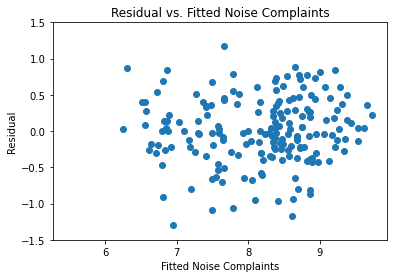

In [43]:
# plot 
plt.scatter(model.fittedvalues, model.resid)
# adding title and labels
plt.xlabel('Fitted Noise Complaints')
plt.ylabel('Residual')
plt.ylim(-1.5,1.5)
plt.title('Residual vs. Fitted Noise Complaints')
plt.show()

/Users/yufeitang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

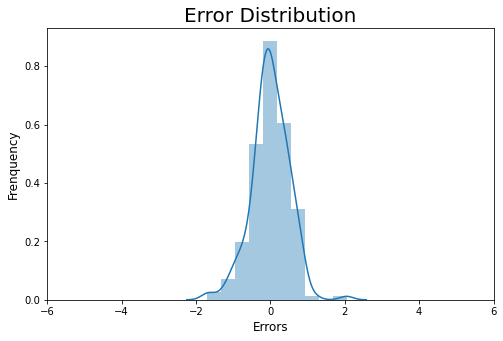

In [44]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(8,5))
sns.distplot((model.resid), bins = 10)
plt.title('Error Distribution', fontsize = 20)
plt.xlim([-6,6])
plt.xlabel('Errors', fontsize = 12)  
plt.ylabel('Frenquency', fontsize = 12) 
plt.show()
#plt.savefig("error_distribution.png", dpi=600)